In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda, Permute, Reshape
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, ZeroPadding2D, MaxPooling2D
import keras.backend as K
import matplotlib.pyplot as plt 
import matplotlib.image 
import skimage.io
import skimage.transform
from PIL import Image
import numpy as np
import math
import copy
from keras import optimizers


Using TensorFlow backend.
In C:\Users\sabin\anaconda3\envs\gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sabin\anaconda3\envs\gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sabin\anaconda3\envs\gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\sabin\anaconda3\envs\gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sabin\anaconda3\en

In [2]:
K.clear_session()
K.set_image_data_format( 'channels_last' )
classes = 5
img_rows, img_cols =224,224
batch_size = 1



In [3]:
train_dir= "dataset/train/"
valid_dir = "dataset/test/"

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest')


validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        valid_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 8018 images belonging to 5 classes.
Found 2012 images belonging to 5 classes.


In [5]:
#classification model designing
model = Sequential()

model.add(Conv2D(128, (3, 3), padding='same',input_shape= (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dropout(0.2))


model.add(Dense(classes))
model.add(Activation('softmax'))


print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 128)     3584      
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 128)     147584    
_________________________________________________________________
activation_2 (Activation)    (None, 222, 222, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 220, 220, 128)     147584    
_________________________________________________________________
activation_3 (Activation)    (None, 220, 220, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 128)    

In [6]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("dataset/datum_c5.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0.001, 
                          patience = 25, 
                          verbose = 1,
                          restore_best_weights = True) 

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.001,
                              patience = 25,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr = 0.0001),
              metrics = ['accuracy'])

nb_train_samples =8018
nb_validation_samples = 2012
epochs = 100

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples)

Epoch 1/100
8018/8018 [==============================] - 511s 64ms/step - loss: 1.5714 - accuracy: 0.2663 - val_loss: 1.6843 - val_accuracy: 0.2614

Epoch 00001: val_loss improved from inf to 1.68434, saving model to dataset/datum_c5.h5
Epoch 2/100
8018/8018 [==============================] - 517s 64ms/step - loss: 1.4785 - accuracy: 0.3654 - val_loss: 1.6077 - val_accuracy: 0.4279

Epoch 00002: val_loss improved from 1.68434 to 1.60773, saving model to dataset/datum_c5.h5
Epoch 3/100
8018/8018 [==============================] - 523s 65ms/step - loss: 1.3671 - accuracy: 0.4284 - val_loss: 1.6652 - val_accuracy: 0.4205

Epoch 00003: val_loss did not improve from 1.60773
Epoch 4/100
8018/8018 [==============================] - 540s 67ms/step - loss: 1.3157 - accuracy: 0.4539 - val_loss: 1.7566 - val_accuracy: 0.4920

Epoch 00004: val_loss did not improve from 1.60773
Epoch 5/100
8018/8018 [==============================] - 546s 68ms/step - loss: 1.2635 - accuracy: 0.4813 - val_loss: 1.27

Epoch 40/100
8018/8018 [==============================] - 498s 62ms/step - loss: 0.5977 - accuracy: 0.7920 - val_loss: 2.1947 - val_accuracy: 0.8146

Epoch 00040: val_loss did not improve from 0.54773
Epoch 41/100
8018/8018 [==============================] - 508s 63ms/step - loss: 0.5921 - accuracy: 0.7900 - val_loss: 1.0943 - val_accuracy: 0.8201

Epoch 00041: val_loss did not improve from 0.54773
Epoch 42/100
8018/8018 [==============================] - 522s 65ms/step - loss: 0.5724 - accuracy: 0.7956 - val_loss: 1.9896 - val_accuracy: 0.7793

Epoch 00042: val_loss did not improve from 0.54773
Epoch 43/100
8018/8018 [==============================] - 510s 64ms/step - loss: 0.5704 - accuracy: 0.7988 - val_loss: 1.3869 - val_accuracy: 0.8121

Epoch 00043: val_loss did not improve from 0.54773
Epoch 44/100
8018/8018 [==============================] - 507s 63ms/step - loss: 0.5637 - accuracy: 0.7995 - val_loss: 1.2497 - val_accuracy: 0.8350

Epoch 00044: val_loss did not improve from 0.5

8018/8018 [==============================] - 512s 64ms/step - loss: 0.4403 - accuracy: 0.8451 - val_loss: 1.0788 - val_accuracy: 0.8926

Epoch 00080: val_loss did not improve from 0.24816
Epoch 81/100
8018/8018 [==============================] - 514s 64ms/step - loss: 0.4134 - accuracy: 0.8481 - val_loss: 0.3526 - val_accuracy: 0.8921

Epoch 00081: val_loss did not improve from 0.24816
Epoch 82/100
8018/8018 [==============================] - 514s 64ms/step - loss: 0.4181 - accuracy: 0.8533 - val_loss: 0.6027 - val_accuracy: 0.8867

Epoch 00082: val_loss did not improve from 0.24816
Epoch 83/100
8018/8018 [==============================] - 515s 64ms/step - loss: 0.4136 - accuracy: 0.8564 - val_loss: 1.5506 - val_accuracy: 0.8698

Epoch 00083: val_loss did not improve from 0.24816
Epoch 84/100
8018/8018 [==============================] - 513s 64ms/step - loss: 0.4065 - accuracy: 0.8593 - val_loss: 0.8360 - val_accuracy: 0.8857

Epoch 00084: val_loss did not improve from 0.24816
Epoch 85

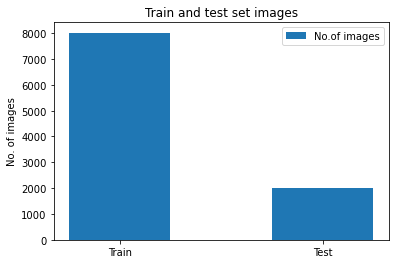

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
x=['Train','Test']

y=[8018,2012]
xpos = np.arange(len(x))
plt.bar(xpos,y,width=0.5, label="No.of images")
plt.xticks(xpos,x)

plt.ylabel("No. of images")
plt.title('Train and test set images')
plt.legend()



366 363 407 402 474
2012


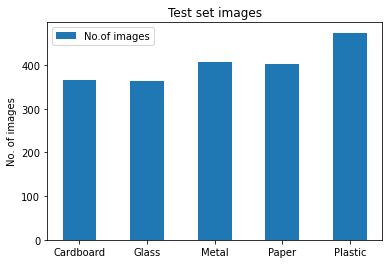

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
x=['Cardboard','Glass','Metal','Paper','Plastic']
cardboard=os.listdir("dataset/test/cardboard")
glass=os.listdir("dataset/test/glass")
metal=os.listdir("dataset/test/metal")
paper=os.listdir("dataset/test/paper")
plastic=os.listdir("dataset/test/plastic")

y=[len(cardboard),len(glass),len(metal),len(paper),len(plastic)]

xpos = np.arange(len(x))
plt.bar(xpos,y,width=0.5, label="No.of images")
plt.xticks(xpos,x)

plt.ylabel("No. of images")
plt.title('Test set images')
plt.legend()
print(len(cardboard),len(glass),len(metal),len(paper),len(plastic))
print(len(cardboard)+len(glass)+len(metal)+len(paper)+len(plastic))


1461 1440 1625 1600 1892
8018


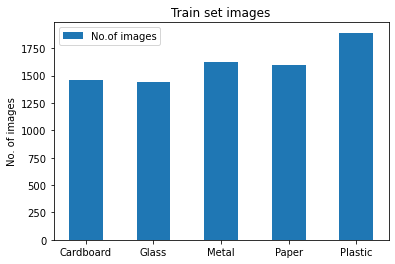

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
x=['Cardboard','Glass','Metal','Paper','Plastic']
cardboard=os.listdir("dataset/train/cardboard")
glass=os.listdir("dataset/train/glass")
metal=os.listdir("dataset/train/metal")
paper=os.listdir("dataset/train/paper")
plastic=os.listdir("dataset/train/plastic")

y=[len(cardboard),len(glass),len(metal),len(paper),len(plastic)]

xpos = np.arange(len(x))
plt.bar(xpos,y,width=0.5, label="No.of images")
plt.xticks(xpos,x)

plt.ylabel("No. of images")
plt.title('Train set images')
plt.legend()

print(len(cardboard),len(glass),len(metal),len(paper),len(plastic))
print(len(cardboard)+len(glass)+len(metal)+len(paper)+len(plastic))

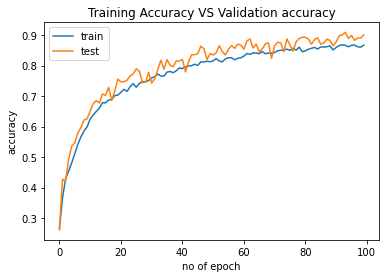

In [10]:
import matplotlib.pyplot as plt
# For accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy VS Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

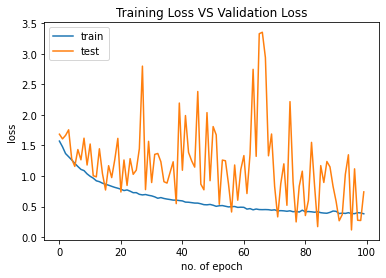

In [11]:
#For loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss VS Validation Loss')
plt.ylabel('loss')
plt.xlabel('no. of epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[0.3159973  0.4084195  0.00967565 0.21160969 0.05429794]]
0.4084195
Invalid input


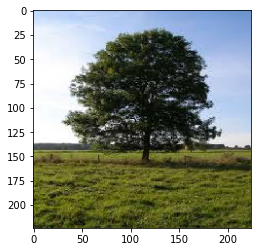

In [6]:
import numpy as np
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import load_model
import sklearn
import matplotlib.pyplot as plt

classifier = load_model('dataset/datum_c5.h5')

test_image = image.load_img('dataset/single_prediction/tree.jpg',
target_size = (224,224,3))
plt.figure()
plt.imshow(test_image)

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict_classes(test_image)
predictions=model.predict(test_image)

print(predictions)
   
prediction=max(predictions)

prediction=max(prediction)

print(prediction)

if(prediction>=0.5):
    x =result[0]
    a = {0: 'Cardboard', 1: 'Glass', 2: 'Metal', 3: 'Paper', 4: 'Plastic'}
   

    print(a[x])
 

else:
    print("Invalid input")
    


<Figure size 432x288 with 0 Axes>

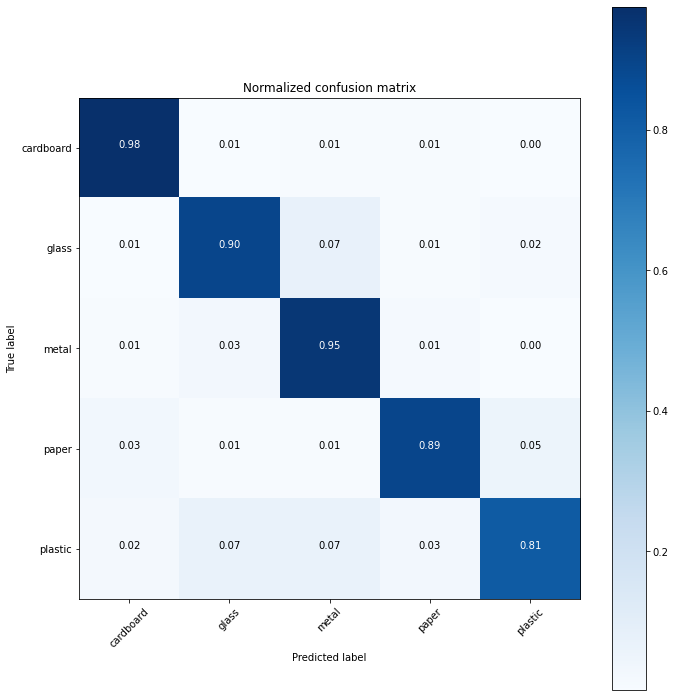

In [13]:
# show the confusion matrix of our predictions
import sklearn

# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [14]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred,average='weighted')

print('precision score: {0:0.2f}'.format(precision))

precision score: 0.90


In [15]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred,average='weighted')

print('recall score: {0:0.2f}'.format(recall))

recall score: 0.90


In [16]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred,average='macro')

print('f1 core: {0:0.2f}'.format(f1))

f1 core: 0.90
